<a href="https://colab.research.google.com/github/danielprikryl/Project/blob/main/07_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizations

We will now demonstrate the use cases of particular plot types. Knowing when to use what is extremely important, and plotting datasets to estimate trends and hone your intuition will easily become your greatest asset.

#### Plotting libraries

Aside from matplotlib and plotly, you should also become familiar with *seaborn* library, which is perhaps best known for plotting of heatmaps. But generally, it does not matter which library you use, as long you fulfill the task at hand.

#### The task
We will use the well-known **Iris** dataset for this task. Let's load the dataset and continue from there...

In [14]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_frame = pd.read_csv('joint_data.csv')




In [7]:
today = pd.Timestamp.today()
print(today)

2024-07-16 08:25:41.106377


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Load and preprocess the data
data = pd.read_csv('joint_data.csv')

# Filter out the 'unknown' values
data_filtered = data[data['y'] != 'unknown']

# Separate features and target
X = data_filtered.drop('y', axis=1)
y = data_filtered['y']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 2. Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a pipeline with preprocessor and neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 5. Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 6. Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# 7. Fit the pipeline
pipeline.fit(X_train, y_train, classifier__epochs=50, classifier__batch_size=32, classifier__validation_split=0.2)

# 8. Evaluate the model
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Train accuracy: {train_score:.4f}")
print(f"Test accuracy: {test_score:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 21), found shape=(None, 47)


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Load and preprocess the data
data = pd.read_csv('joint_data.csv')

# Filter out the 'unknown' values
data_filtered = data[data['y'] != 'unknown']

# Separate features and target
X = data_filtered.drop('y', axis=1)
y = data_filtered['y']

# Encode the target variable
y = (y == 'yes').astype(int)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 2. Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Fit the preprocessor and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# 5. Create the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 6. Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 7. Fit the model
history = model.fit(X_train_preprocessed, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 8. Evaluate the model
train_score = model.evaluate(X_train_preprocessed, y_train, verbose=0)
test_score = model.evaluate(X_test_preprocessed, y_test, verbose=0)

print(f"Train accuracy: {train_score[1]:.4f}")
print(f"Test accuracy: {test_score[1]:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
91/91 [==============================] - 4s 13ms/step - loss: 0.4343 - accuracy: 0.8382 - val_loss: 0.2773 - val_accuracy: 0.8881
Epoch 2/50
91/91 [==============================] - 0s 4ms/step - loss: 0.2683 - accuracy: 0.8852 - val_loss: 0.2395 - val_accuracy: 0.8909
Epoch 3/50
91/91 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.8956 - val_loss: 0.2234 - val_accuracy: 0.8881
Epoch 4/50
91/91 [==============================] - 0s 5ms/step - loss: 0.2294 - accuracy: 0.8970 - val_loss: 0.2132 - val_accuracy: 0.8923
Epoch 5/50
91/91 [==============================] - 0s 5ms/step - loss: 0.2241 - accuracy: 0.8911 - val_loss: 0.2121 - val_accuracy: 0.8936
Epoch 6/50
91/91 [==============================] - 0s 4ms/step - loss: 0.2194 - accuracy: 0.8997 - val_loss: 0.2132 - val_accuracy: 0.8950
Epoch 7/50
91/91 [==============================] - 0s 5ms/step - loss: 0.2058 - accuracy: 0.9042 - val_loss: 0.2110 - val_accuracy: 0.8978
Epoch 8/50
91/91 [=

In [18]:
# 1. Filter the original data to get the 'unknown' cases
unknown_data = data[data['y'] == 'unknown']

# 2. Prepare the features for prediction
X_unknown = unknown_data.drop('y', axis=1)

# 3. Preprocess the unknown data using the fitted preprocessor
X_unknown_preprocessed = preprocessor.transform(X_unknown)

# 4. Make predictions
predictions = model.predict(X_unknown_preprocessed)

# 5. Convert probabilities to binary predictions (optional)
binary_predictions = (predictions > 0.5).astype(int)

# 6. Add predictions to the unknown_data DataFrame
unknown_data['predicted_probability'] = predictions
unknown_data['predicted_subscription'] = binary_predictions

# 7. Display the first few rows of the results
print(unknown_data[['predicted_probability', 'predicted_subscription']].head())

# 8. Save the results to a CSV file (optional)
unknown_data.to_csv('predictions_unknown_cases.csv', index=False)

# 9. Print some summary statistics
print("\nSummary of predictions:")
print(f"Total unknown cases: {len(unknown_data)}")
print(f"Predicted subscriptions: {binary_predictions.sum()}")
print(f"Predicted non-subscriptions: {len(binary_predictions) - binary_predictions.sum()}")
print(f"Subscription rate: {binary_predictions.mean():.2%}")

1272/1272 [==============================] - 7s 5ms/step


<ipython-input-18-2b90674ef775>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data['predicted_probability'] = predictions
<ipython-input-18-2b90674ef775>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data['predicted_subscription'] = binary_predictions


   predicted_probability  predicted_subscription
0           1.908128e-10                       0
1           5.188902e-12                       0
2           5.617962e-12                       0
3           5.285900e-15                       0
4           9.273655e-13                       0

Summary of predictions:
Total unknown cases: 40690
Predicted subscriptions: 4385
Predicted non-subscriptions: 36305
Subscription rate: 10.78%


<ipython-input-19-eafa25dd2a58>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


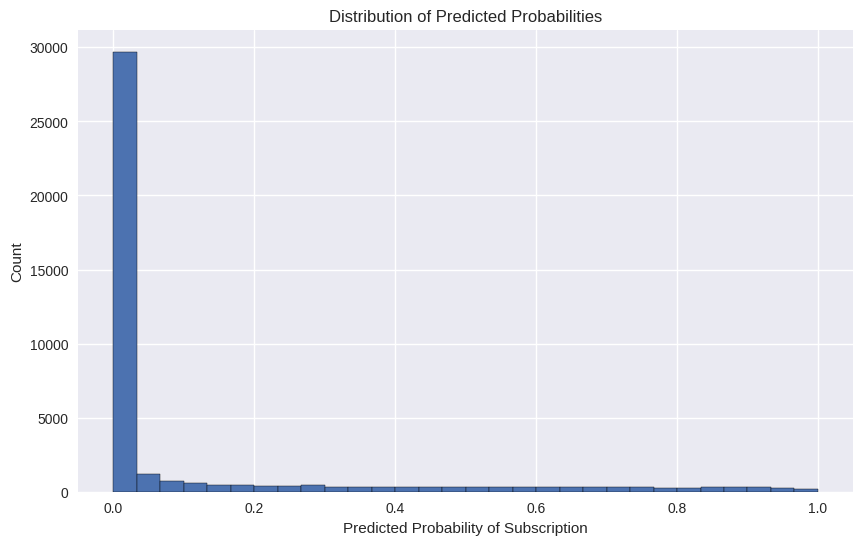

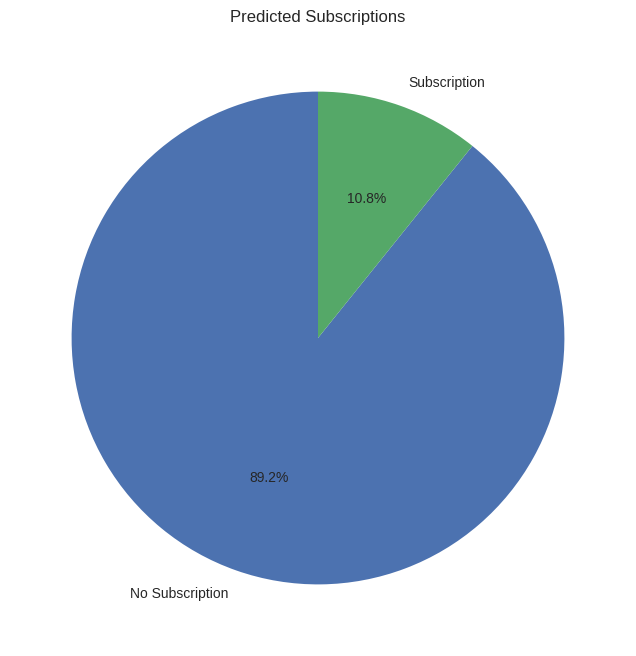

<ipython-input-19-eafa25dd2a58>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data['age_group'] = pd.cut(unknown_data['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])


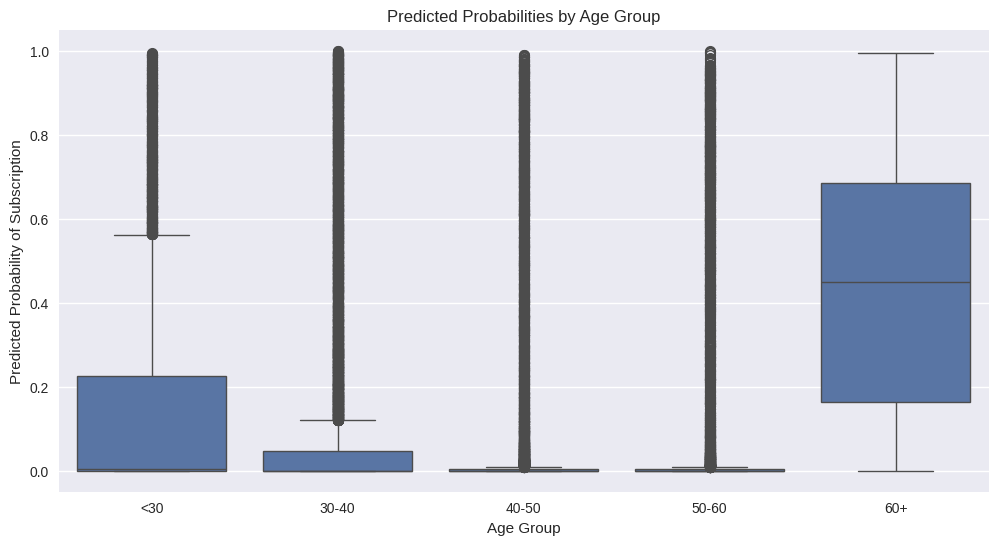

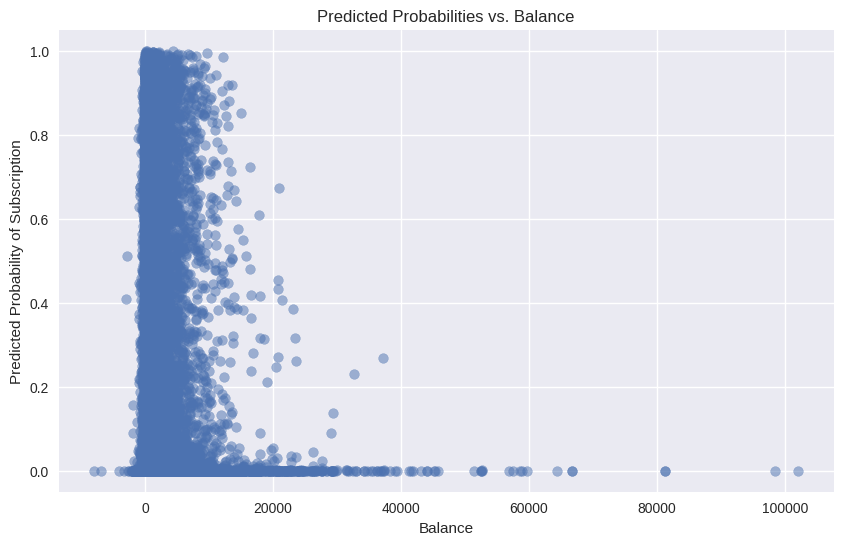

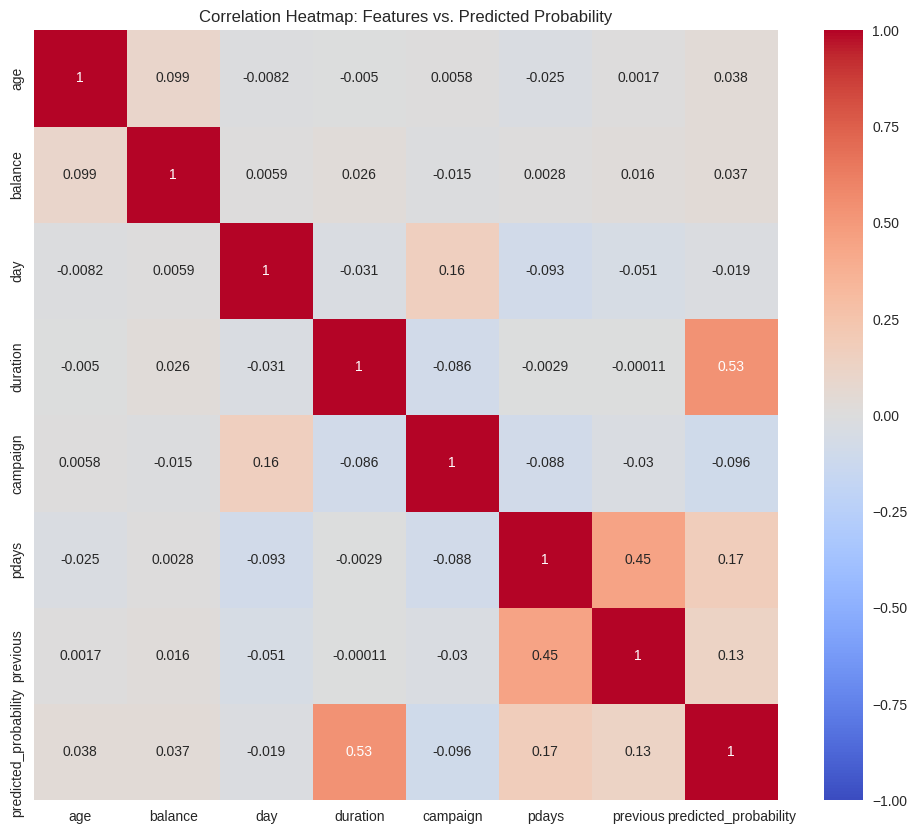

In [19]:

# Set the style for better-looking plots
plt.style.use('seaborn')

# 1. Histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(unknown_data['predicted_probability'], bins=30, edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Subscription')
plt.ylabel('Count')
plt.show()

# 2. Pie chart of binary predictions
plt.figure(figsize=(8, 8))
subscription_counts = unknown_data['predicted_subscription'].value_counts()
plt.pie(subscription_counts, labels=['No Subscription', 'Subscription'], autopct='%1.1f%%', startangle=90)
plt.title('Predicted Subscriptions')
plt.show()

# 3. Box plot of predicted probabilities by age group
unknown_data['age_group'] = pd.cut(unknown_data['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='predicted_probability', data=unknown_data)
plt.title('Predicted Probabilities by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Predicted Probability of Subscription')
plt.show()

# 4. Scatter plot of predicted probabilities vs. balance
plt.figure(figsize=(10, 6))
plt.scatter(unknown_data['balance'], unknown_data['predicted_probability'], alpha=0.5)
plt.title('Predicted Probabilities vs. Balance')
plt.xlabel('Balance')
plt.ylabel('Predicted Probability of Subscription')
plt.show()

# 5. Heatmap of correlation between features and predicted probability
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'predicted_probability']
correlation = unknown_data[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Features vs. Predicted Probability')
plt.show()

## Plotting

We are generally interested in the following things during EDA:

- distributions of individual variables
- data spread and outliers
- how pairs of features relate to each other, i.e. bivariate relations
    - correlations fall into this category aswell


<ipython-input-4-00a43338e730>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


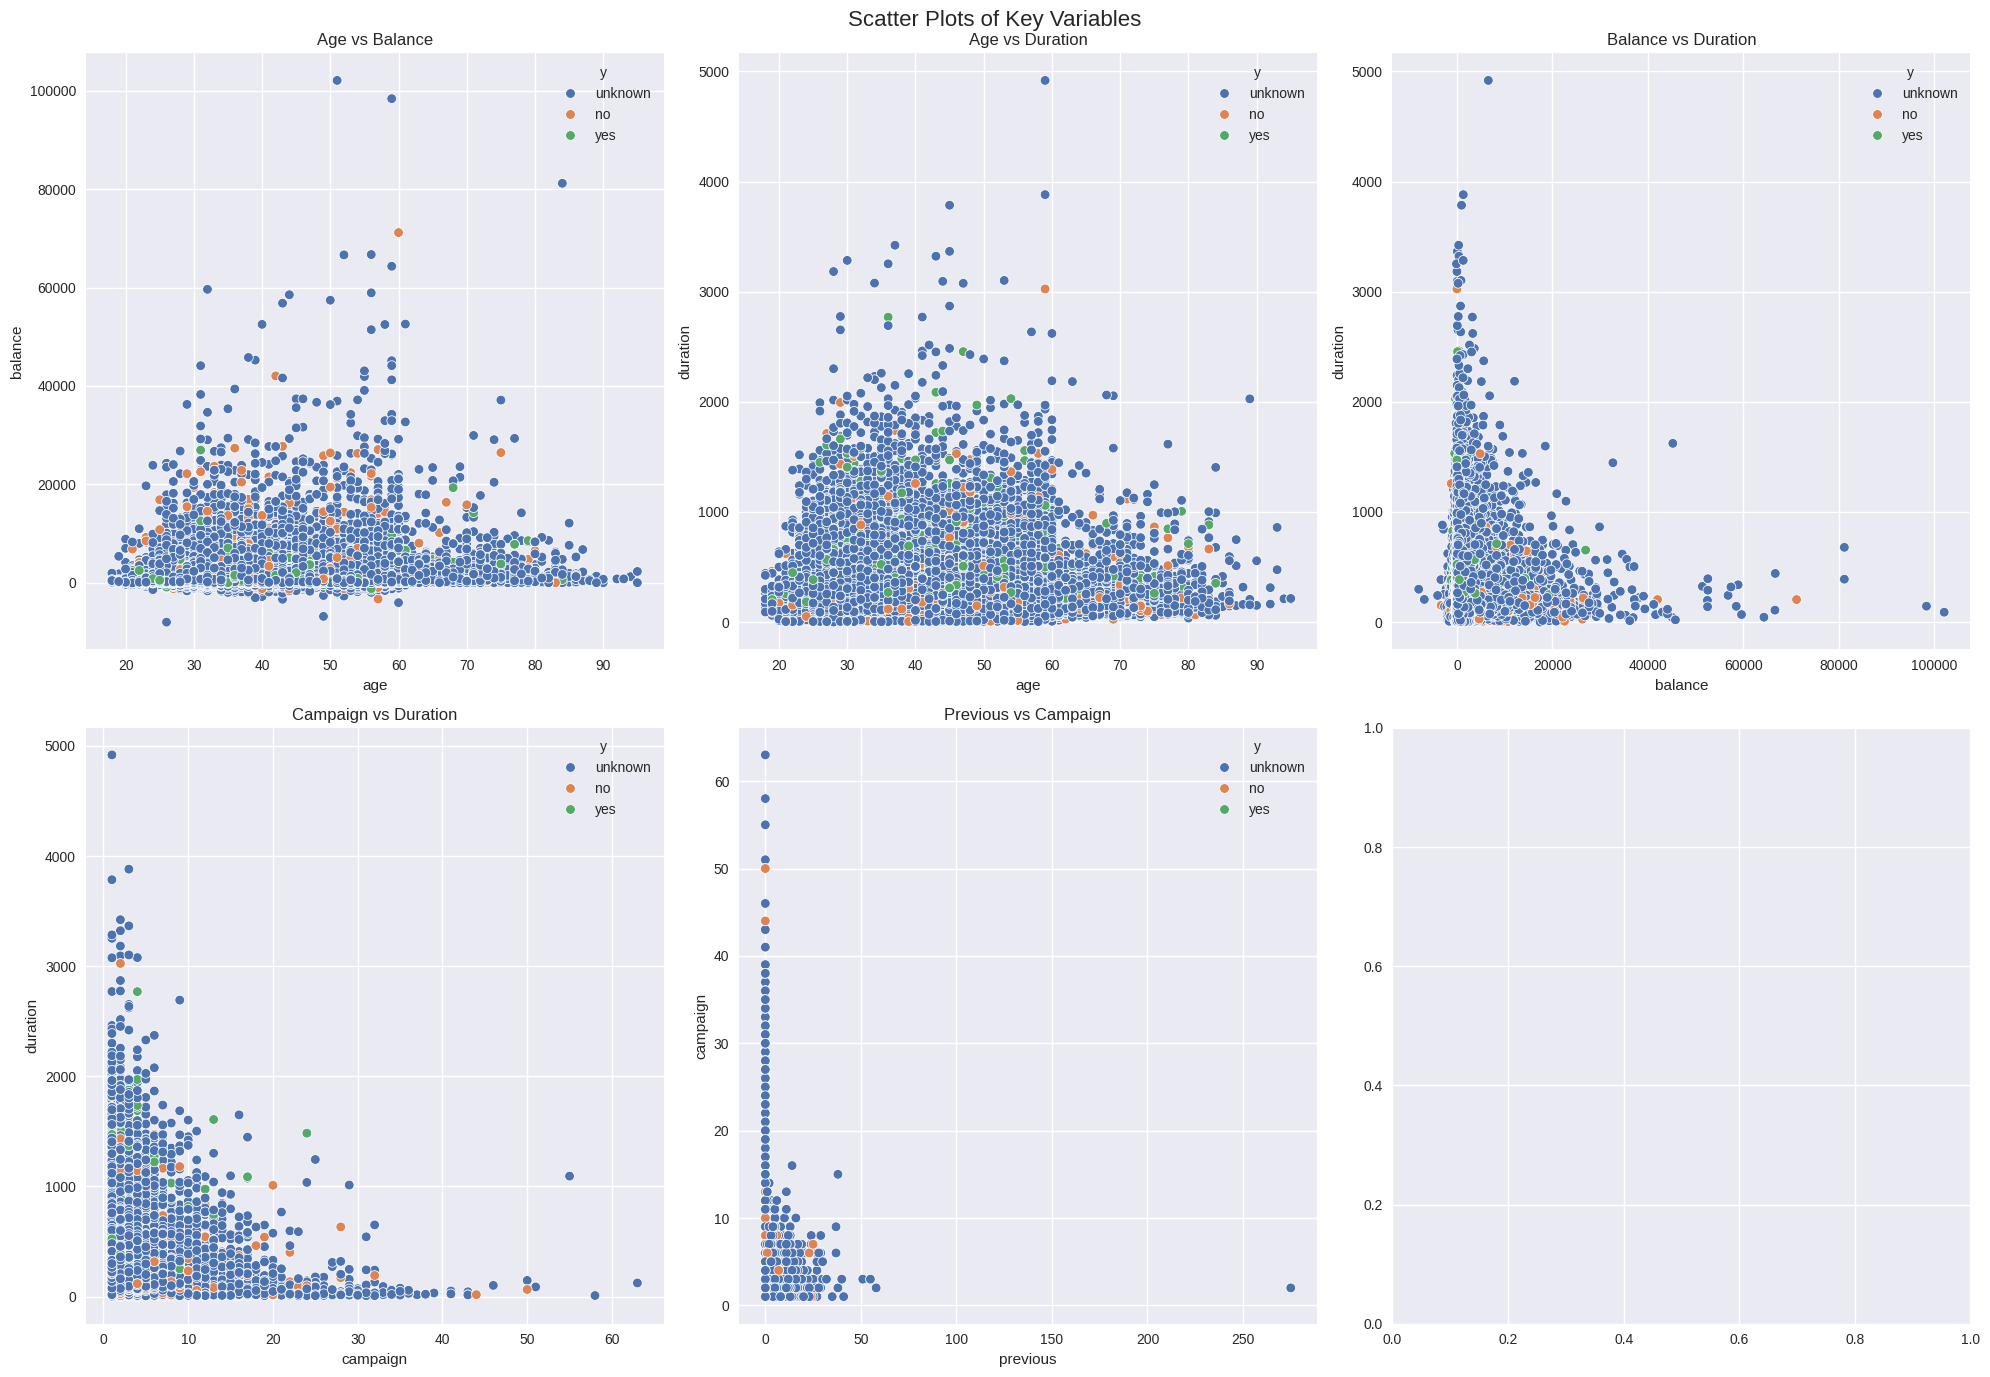

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
plt.style.use('seaborn')
sns.set_palette("deep")

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('Scatter Plots of Key Variables', fontsize=16)

# Age vs Balance
sns.scatterplot(data=data_frame, x='age', y='balance', hue='y', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Balance')

# Age vs Duration
sns.scatterplot(data=data_frame, x='age', y='duration', hue='y', ax=axes[0, 1])
axes[0, 1].set_title('Age vs Duration')

# Balance vs Duration
sns.scatterplot(data=data_frame, x='balance', y='duration', hue='y', ax=axes[0, 2])
axes[0, 2].set_title('Balance vs Duration')

# Campaign vs Duration
sns.scatterplot(data=data_frame, x='campaign', y='duration', hue='y', ax=axes[1, 0])
axes[1, 0].set_title('Campaign vs Duration')

# Previous vs Campaign
sns.scatterplot(data=data_frame, x='previous', y='campaign', hue='y', ax=axes[1, 1])
axes[1, 1].set_title('Previous vs Campaign')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<ipython-input-6-f443d8a48633>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


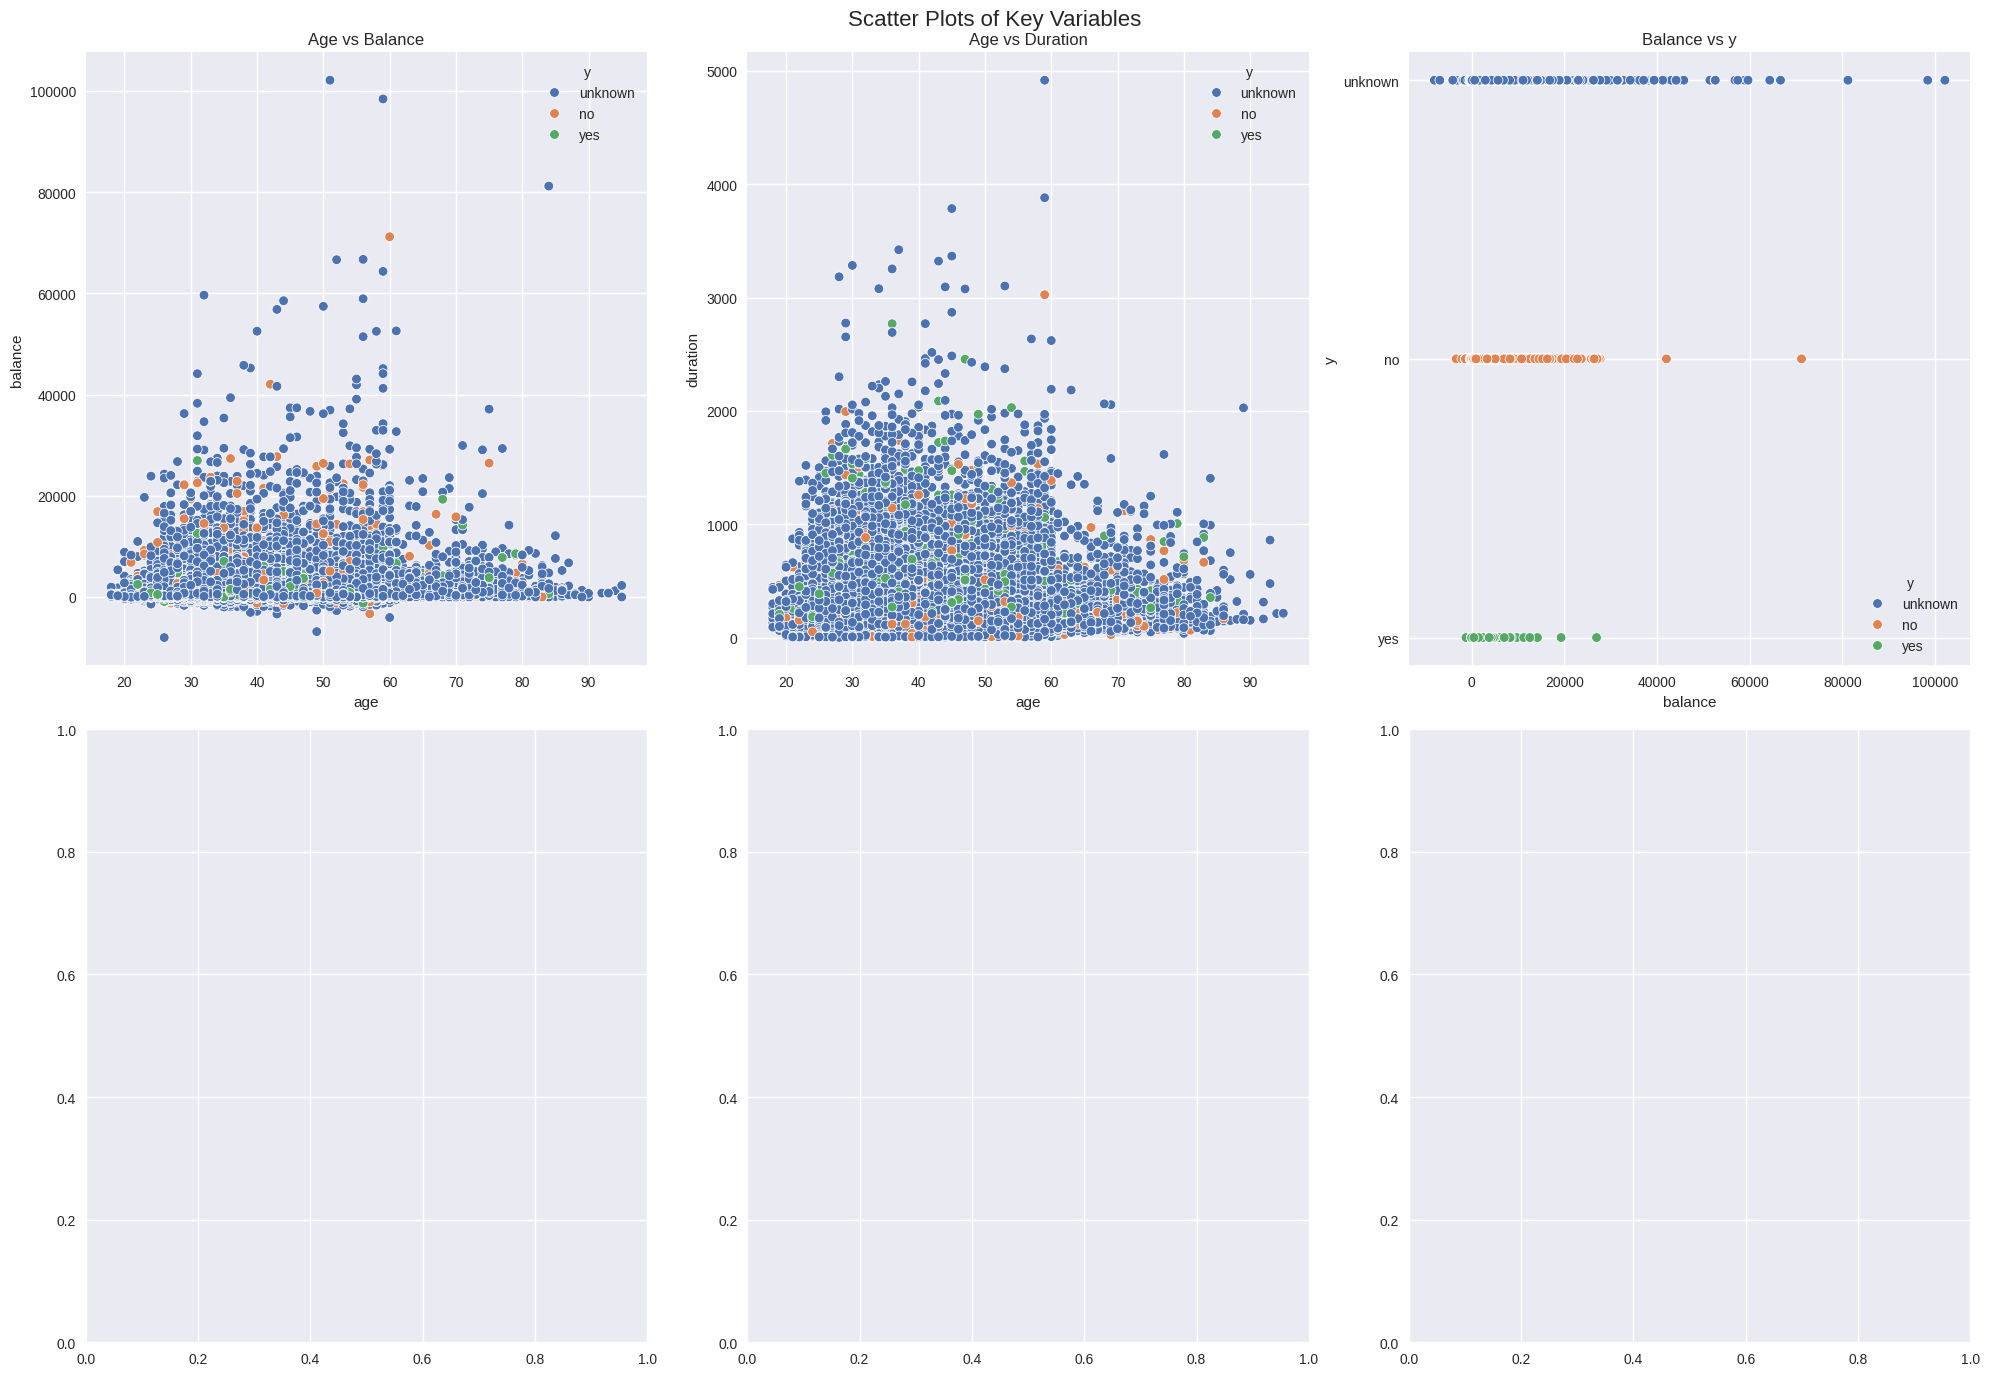

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
plt.style.use('seaborn')
sns.set_palette("deep")

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('Scatter Plots of Key Variables', fontsize=16)

# Age vs Balance
sns.scatterplot(data=data_frame, x='age', y='balance', hue='y', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Balance')

# Age vs Duration
sns.scatterplot(data=data_frame, x='age', y='duration', hue='y', ax=axes[0, 1])
axes[0, 1].set_title('Age vs Duration')

# Balance vs y

sns.scatterplot(data=data_frame, x='balance', y='y', hue='y', ax=axes[0, 2])
axes[0, 2].set_title('Balance vs y')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<ipython-input-7-a3bef8f3ac7d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_filtered['y'] = data_frame_filtered['y'].astype('category')


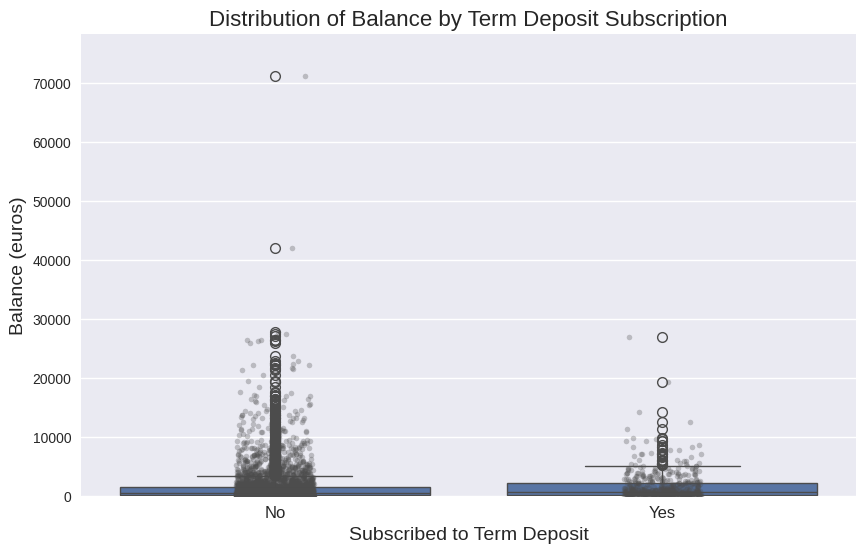

      count         mean          std     min    25%    50%     75%      max
y                                                                           
no   4000.0  1403.211750  3075.349313 -3313.0   61.0  419.5  1407.0  71188.0
yes   521.0  1571.955854  2444.398956 -1206.0  171.0  710.0  2160.0  26965.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out 'unknown' results
data_frame_filtered = data_frame[data_frame['y'].isin(['yes', 'no'])]

# Ensure 'y' is treated as a categorical variable
data_frame_filtered['y'] = data_frame_filtered['y'].astype('category')

# Create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=data_frame_filtered)

# Customize the plot
plt.title('Distribution of Balance by Term Deposit Subscription', fontsize=16)
plt.xlabel('Subscribed to Term Deposit', fontsize=14)
plt.ylabel('Balance (euros)', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)

# Add a strip plot to show individual data points
sns.stripplot(x='y', y='balance', data=data_frame_filtered, size=4, color=".3", alpha=0.3)

# Adjust y-axis to show full range of balances
plt.ylim(bottom=0)  # Start y-axis at 0
top_balance = data_frame_filtered['balance'].max()
plt.ylim(top=top_balance * 1.1)  # Set top of y-axis to 110% of max balance

plt.show()

# Print some summary statistics
print(data_frame_filtered.groupby('y')['balance'].describe())

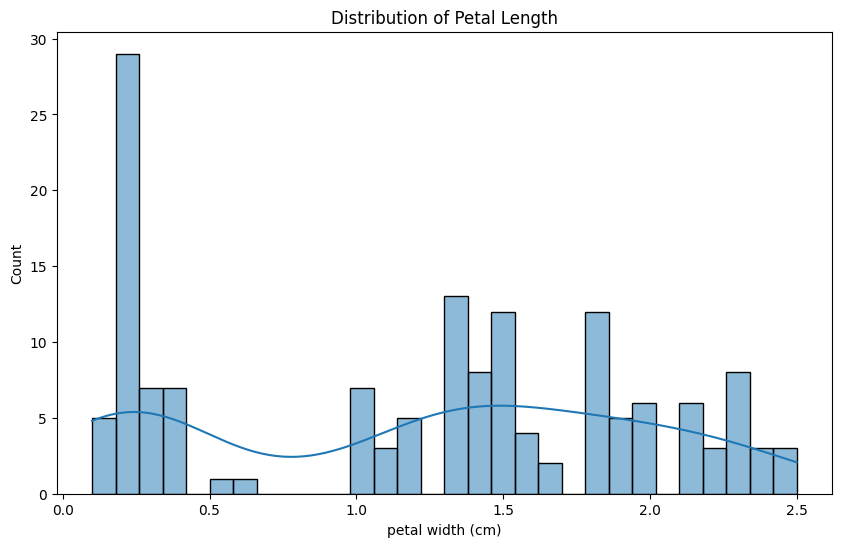

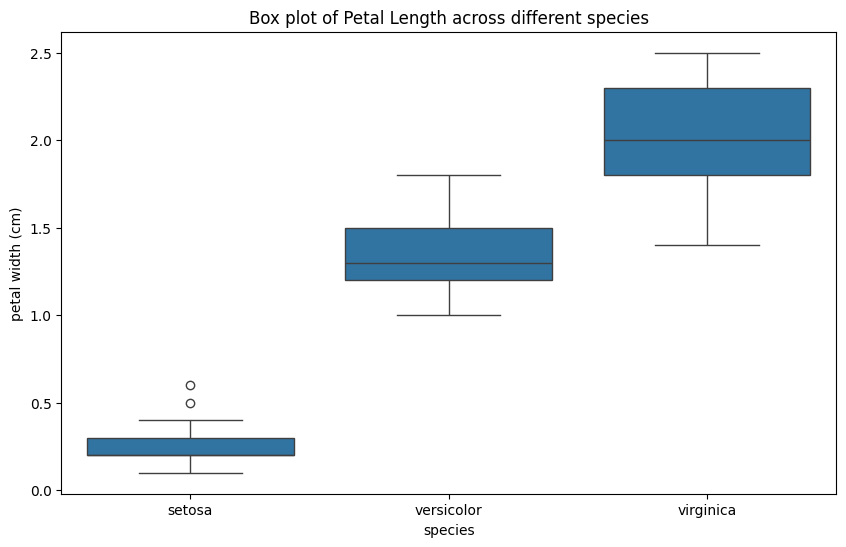

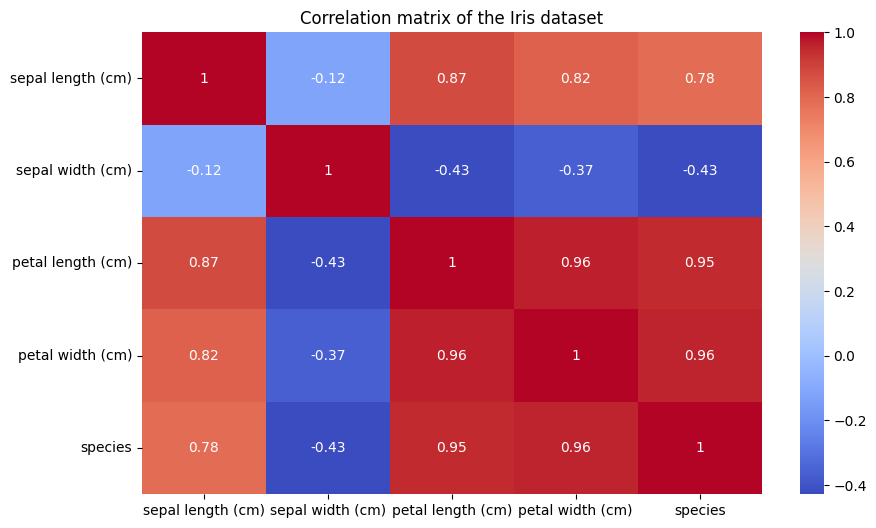

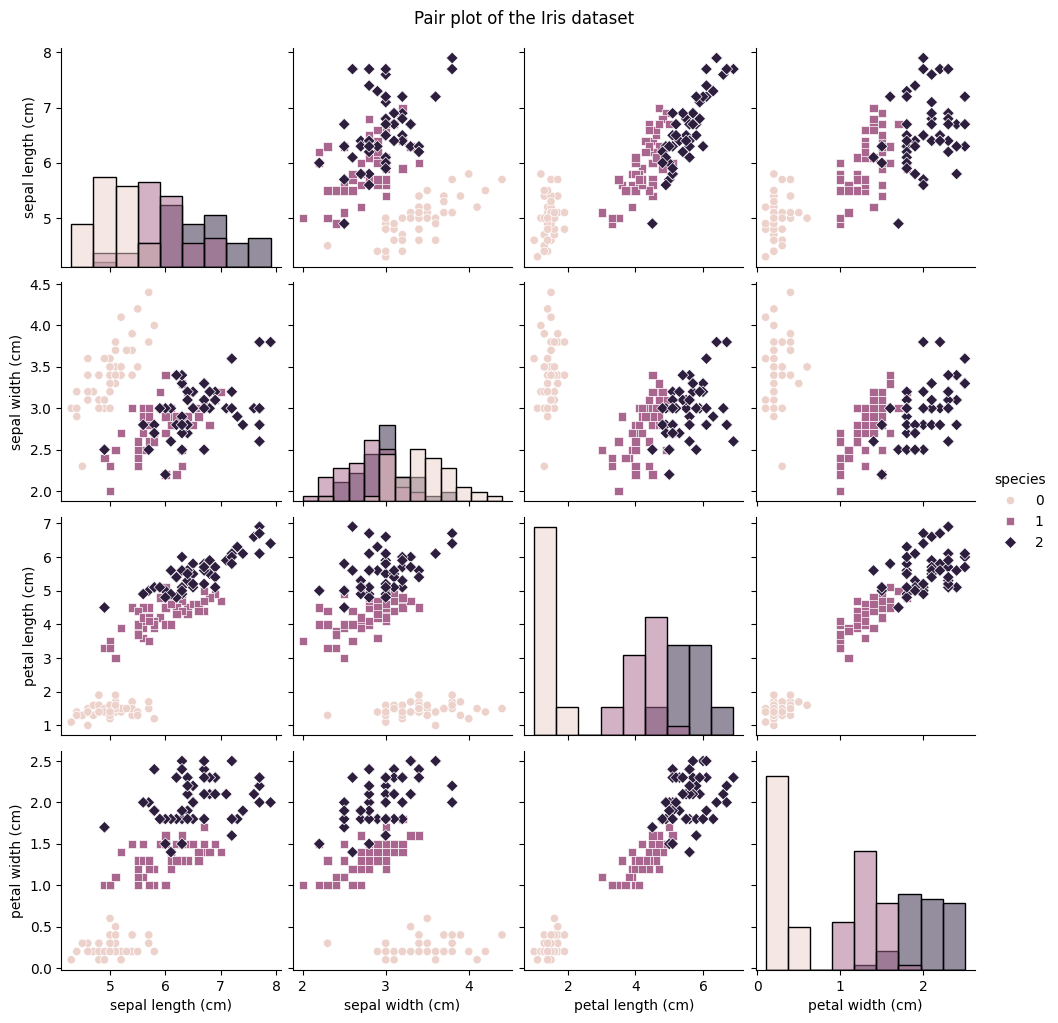

In [ ]:
# HISTOGRAM
# Plotting a histogram for one of the features in the dataset
plt.figure(figsize=(10,6))
sns.histplot(data=iris, x='petal width (cm)', bins=30, kde=True)
plt.title('Distribution of Petal Length')
plt.show()

# BOX PLOT
# Creating a box plot to visualize the spread of data & identify outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=iris, x='species', y='petal width (cm)')
plt.title('Box plot of Petal Length across different species')
plt.xticks(ticks=[0,1,2], labels=['setosa', 'versicolor', 'virginica'])  # renaming species for better understanding
plt.show()

# CORRELATION MATRIX
# Calculating the correlation matrix
corr = iris.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of the Iris dataset')
plt.show()

# PAIR PLOT
# Creating a pair plot to visualize the bivariate relation between each pair of features
sns.pairplot(iris, hue='species', diag_kind='hist', markers=["o", "s", "D"])
plt.suptitle('Pair plot of the Iris dataset', y=1.02)
plt.show()


## Observations

What can you say about the dataset judging from the plots above?

   client_id  age           job  marital  education  account_id in_default  \
0    4815378   58    management  married   tertiary           1         no   
1    5217541   44    technician   single  secondary           2         no   
2    6654642   33  entrepreneur  married  secondary           3         no   
3    1421898   47   blue-collar  married    unknown           4         no   
4    2387933   33       unknown   single    unknown           5         no   

   balance housing loan  ... day  month  duration campaign  pdays  previous  \
0     2143     yes   no  ...   5    may       261        1     -1         0   
1       29     yes   no  ...   5    may       151        1     -1         0   
2        2     yes  yes  ...   5    may        76        1     -1         0   
3     1506     yes   no  ...   5    may        92        1     -1         0   
4        1      no   no  ...   5    may       198        1     -1         0   

   outcome_id  outcome_campaign_id  poutcome        y  


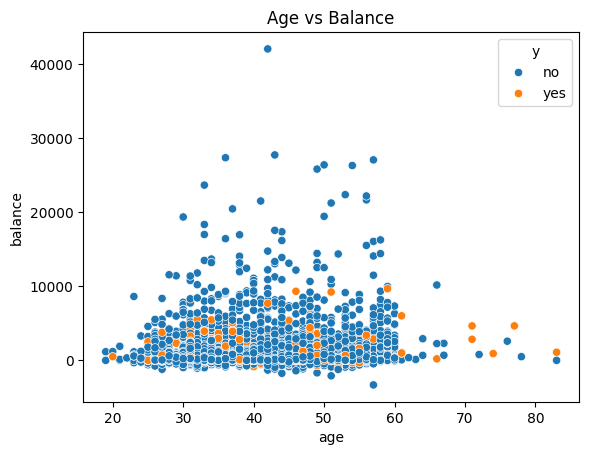

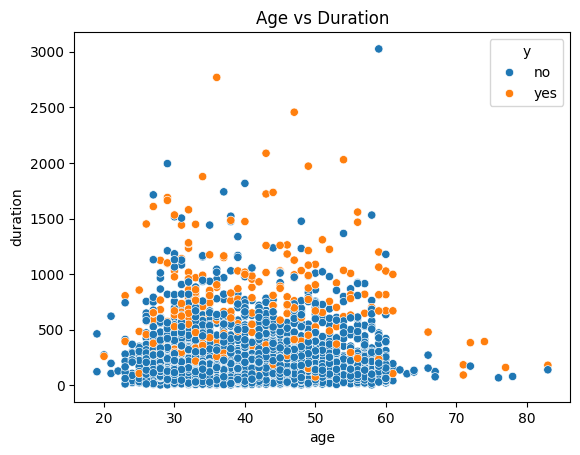

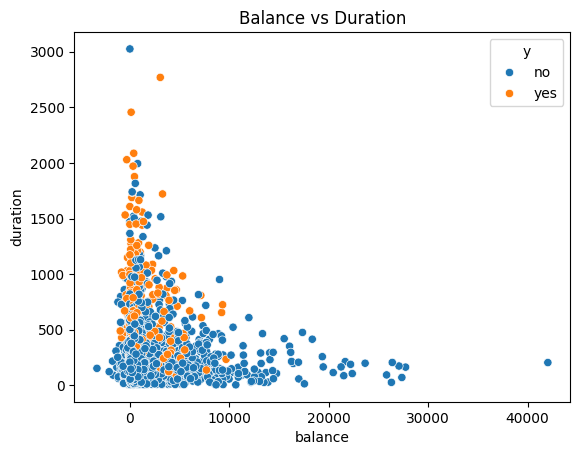

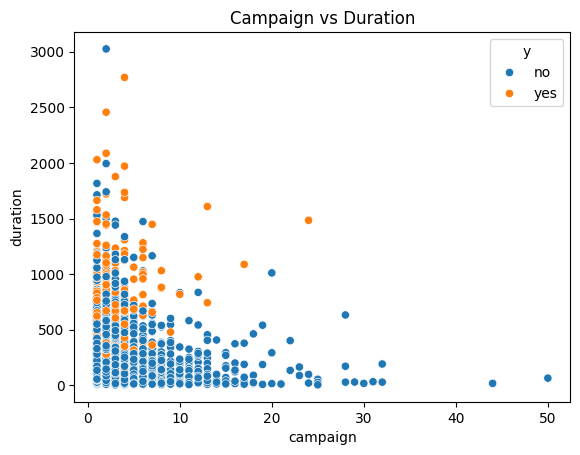

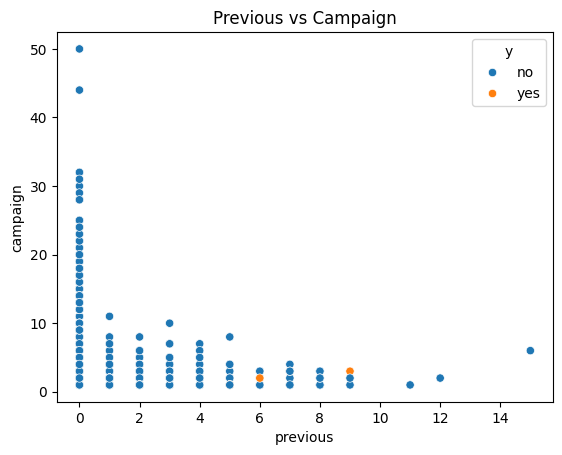

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from CSV
file_path = 'joint_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Filter out rows where 'y' is 'unknown'
filtered_data = data[data['y'] != 'unknown']

# Example visualizations
# Replace 'column1', 'column2', 'column3' with actual column names from your CSV file

# Scatter plot of two numerical columns
sns.scatterplot(data=filtered_data, x='age', y='balance', hue='y')
plt.title('Age vs Balance')
plt.show()

sns.scatterplot(data=filtered_data, x='age', y='duration', hue='y')
plt.title('Age vs Duration')
plt.show()

sns.scatterplot(data=filtered_data, x='balance', y='duration', hue='y')
plt.title('Balance vs Duration')
plt.show()

sns.scatterplot(data=filtered_data, x='campaign', y='duration', hue='y')
plt.title('Campaign vs Duration')
plt.show()

sns.scatterplot(data=filtered_data, x='previous', y='campaign', hue='y')
plt.title('Previous vs Campaign')
plt.show()
